In [1]:
from solve_kidney_exchange import *

In [2]:
solve_cycles=False 
weights, init_graph = solve_kidney_exchange('small.csv', solve_cycles)

Start solving for kidney exchange
Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-25
Size of donors: 5, size of patients: 5
enf of solving for kidney exchange with cycle
Optimal solution:
Assign donor 0 to patient 1
Assign donor 1 to patient 0
Assign donor 2 to patient 2
Assign donor 3 to patient 3
Assign donor 4 to patient 4


In [3]:
import copy

cycles = find_disjoint_cycles(copy.deepcopy(init_graph))

# Print the disjoint cycles
print("Disjoint cycles:")
for cycle in cycles:
    print(cycle)

Disjoint cycles:
['d0', 'p1', 'd1', 'p0', 'd0']
['d2', 'p2', 'd2']
['d3', 'p3', 'd3']
['d4', 'p4', 'd4']


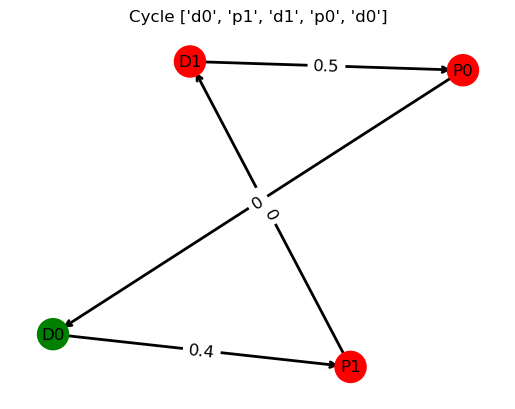

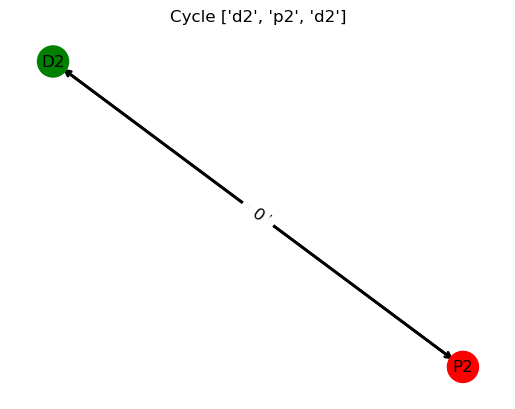

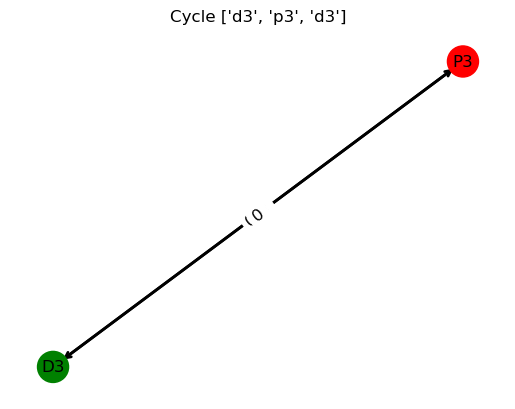

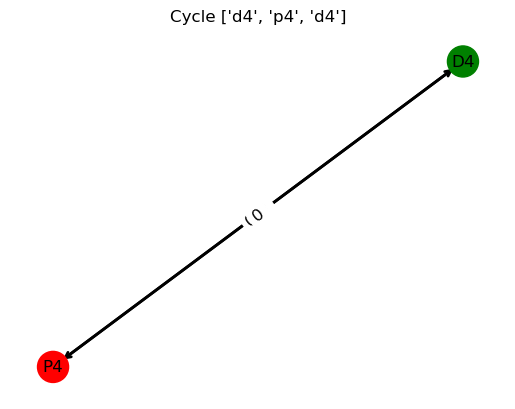

In [4]:
from draw_donation_cycle import *
draw_donation_cycle_graph(cycles, weights)

In [5]:
weights, init_graph_sol = solve_kidney_exchange('small.csv', solve_cycles=True)

Start solving for kidney exchange with cycle
Size of donors: 5, size of patients: 5
enf of solving for kidney exchange with cycle

Optimal solution depends on cycle length 1
[('0', '0'), ('2', '2'), ('3', '3'), ('4', '4')]

Assign donor 0 to patient 0
Assign donor 2 to patient 2
Assign donor 3 to patient 3
Assign donor 4 to patient 4
Cycles of the solution: [['3', '3'], ['0', '0'], ['2', '2'], ['4', '4']]


In [6]:
cycles = find_disjoint_cycles(copy.deepcopy(init_graph_sol))

# Print the disjoint cycles
print("Disjoint cycles:")
for cycle in cycles:
    print(cycle)

Disjoint cycles:
['d0', 'p0', 'd0']
['d2', 'p2', 'd2']
['d3', 'p3', 'd3']
['d4', 'p4', 'd4']


In [7]:
print(weights)

{(0, 0): 0.8, (0, 1): 0.4, (0, 3): 0.4, (0, 4): 0.8, (1, 0): 0.5, (2, 0): 0.4, (2, 2): 0.7, (3, 0): 0.4, (3, 3): 0.9, (4, 0): 0.6, (4, 3): 0.6, (4, 4): 0.8}


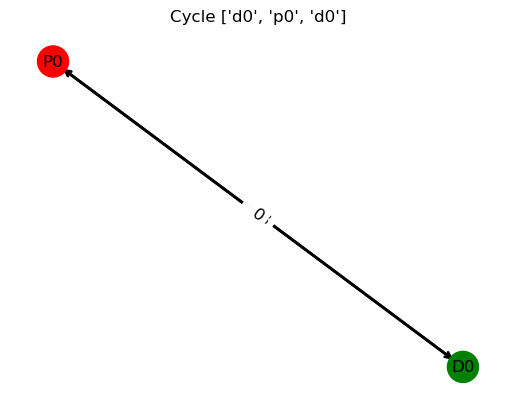

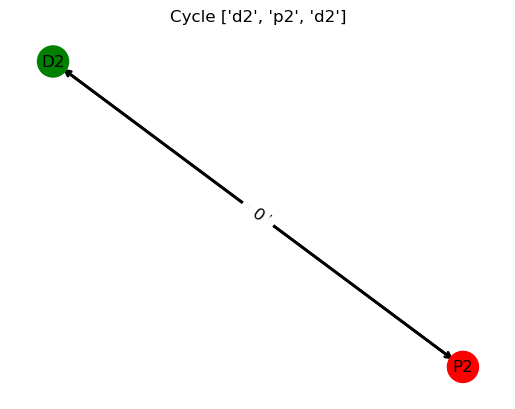

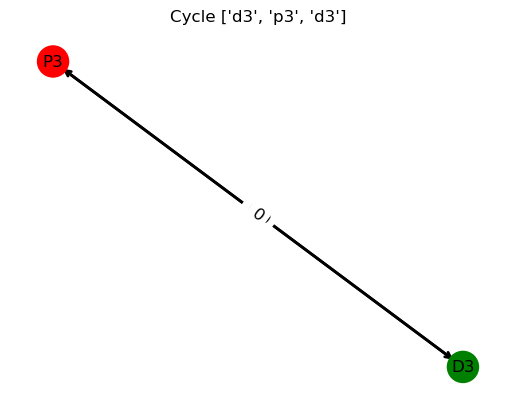

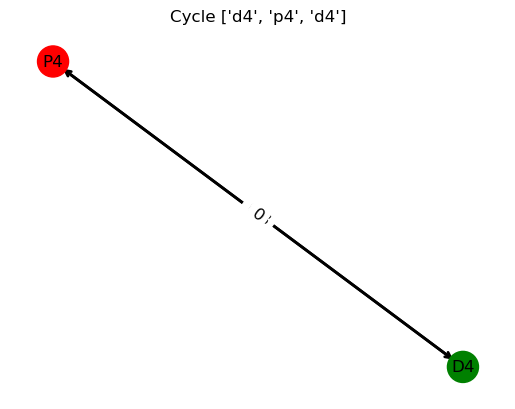

In [8]:
draw_donation_cycle_graph(cycles, weights)

In [9]:
def positive_cycle_elimination(G, weights):
    V = G.keys()  # Vertices of the graph
    E = [(u, v) for u in G for v in G[u]]  # Edges of the graph

    def construct_residual_graph(x):
        F = [(u, v) for (u, v) in E if x[u][v] == 0]  # Forward edges
        B = [(v, u) for (u, v) in E if x[u][v] == 1]  # Backward edges
        return {v: [u for (x, u) in F + B if x == v] for v in V}

    def find_positive_cycle(G, weights):
        dist = {v: 0 for v in V}
        pred = {v: None for v in V}
        cycle = []

        for _ in range(len(V)):
            for (u, v) in E:
                if dist[u] + weights[(u, v)] < dist[v]:
                    dist[v] = dist[u] + weights[(u, v)]
                    pred[v] = u

                    # Check for positive-weight cycle
                    if _ == len(V) - 1:
                        cycle.append(v)
                        w = pred[v]
                        while w != v:
                            cycle.append(w)
                            w = pred[w]

                        return cycle

        return None

    def update_solution(x, cycle):
        for i in range(len(cycle)):
            u = cycle[i]
            v = cycle[(i + 1) % len(cycle)]
            if (u, v) in E:
                x[u][v] = 1
            elif (v, u) in E:
                x[v][u] = 0

        return x

    # Initial solution
    x = {u: {v: 0 for v in G[u]} for u in G}

    while True:
        residual_graph = construct_residual_graph(x)
        cycle = find_positive_cycle(residual_graph, weights)

        if cycle is None:
            break

        x = update_solution(x, cycle)

    return x
